[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0279
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0026
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0010
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 9.8117e-04
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 8.4566e-04
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 7.6901e-04
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 7.4378e-04
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 9.3821e-04
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 8.1389e-04
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 7.3023e-04
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 6.8336e-04
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 7.3275e-04
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 6.4534e-04
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 6.9081e-04
Epoch 15/50
24/24 ━━━━━━

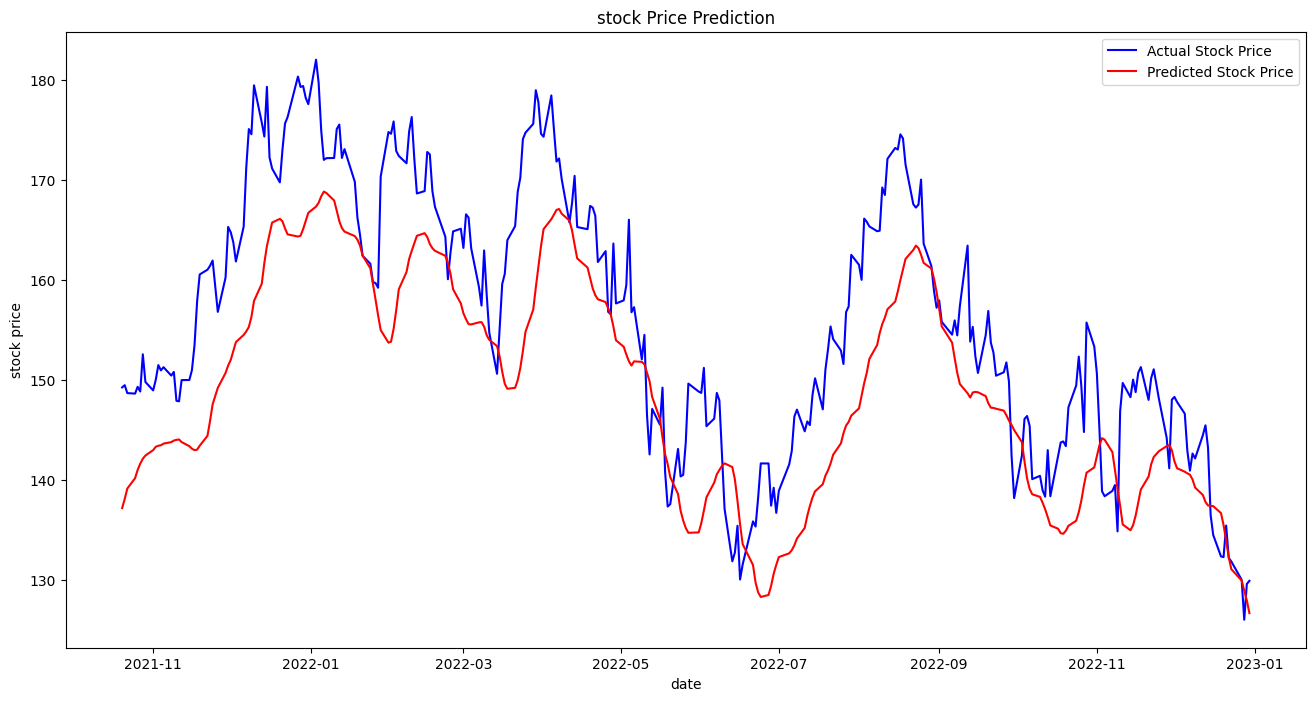

In [19]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
import matplotlib.pyplot as plt
import yfinance as yf


#downloading historical stock price data
stock_data = yf.download('AAPL',start='2015-01-01',end='2023-01-01')
stock_data= stock_data[['Close']]



#preprocessing the data
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(stock_data)


#creating a function to split the dataset into a training and testing sets
def create_dataset(data,time_step=100):

  X,y=[],[]

  for i in range(len(data) - time_step-1):
    X.append(data[i:(i + time_step),0])
    y.append(data[(i + time_step),0])

  return np.array(X), np.array(y)



#create training and testing data
training_size=int(len(scaled_data)*0.80)
train_data,test_data = scaled_data[:training_size],scaled_data[training_size:]



#create train and test splits
time_step=100
X_train,y_train = create_dataset(train_data,time_step) # Now receives both X and y
X_test,y_test = create_dataset(test_data,time_step)


#reshape inputs to be [samples,time steps ,features]
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
x_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)


#define the model[LSTM]

model = Sequential()
model.add(LSTM(units=50,return_sequences = True,input_shape=(time_step,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))


#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


#train the model
model.fit(X_train,y_train,batch_size=64, epochs=50)

#evaluate the model in test data
y_pred = model.predict(X_test)
y_pred=scaler.inverse_transform(y_pred.reshape(-1,1))


#visualize the result
plt.figure(figsize=(16,8))
plt.plot(stock_data.index[training_size + time_step +1:],stock_data['Close'][training_size + time_step + 1:],color = 'blue',label = 'Actual Stock Price')
plt.plot(stock_data.index[training_size + time_step + 1:],y_pred,color='red',label='Predicted Stock Price')
plt.title('stock Price Prediction')
plt.xlabel('date')
plt.ylabel('stock price')
plt.legend()
plt.show()


